<a href="https://colab.research.google.com/github/Akash-Potti/Akash-Potti/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U tensor2tensor
!pip install -q tensorflow matplotlib
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function
from tensorflow import keras
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist


(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


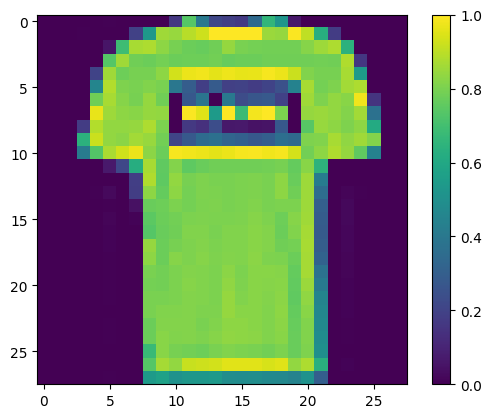

In [ ]:
#Exploring the data
train_images.shape

train_labels
test_images.shape

#preprocess the data
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()



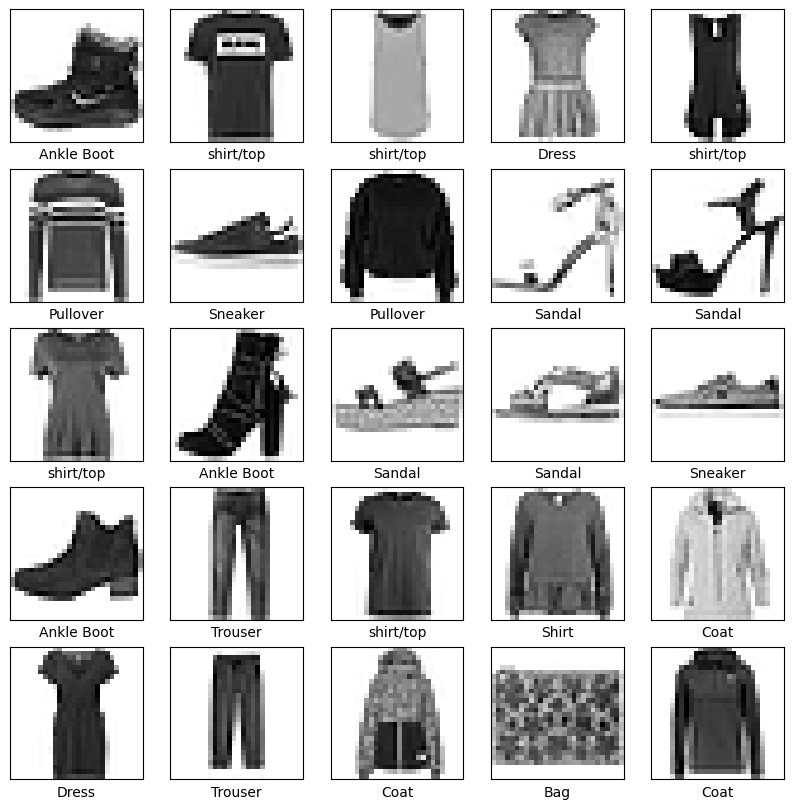

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1033 - accuracy: 0.6535
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6455 - accuracy: 0.7674
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5675 - accuracy: 0.7970
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5244 - accuracy: 0.8149
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4958 - accuracy: 0.8263
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4756 - accuracy: 0.8330
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4607 - accuracy: 0.8377
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4487 - accuracy: 0.8425
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4383 - accuracy: 0.8457
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.429

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

print('Test Accuracy: ',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8778
Test Accuracy:  0.8777999877929688


In [ ]:
predictions=model.predict(test_images)
predictions[0]
np.argmax(predictions[0])


313/313 [==============================] - 1s 2ms/step


9

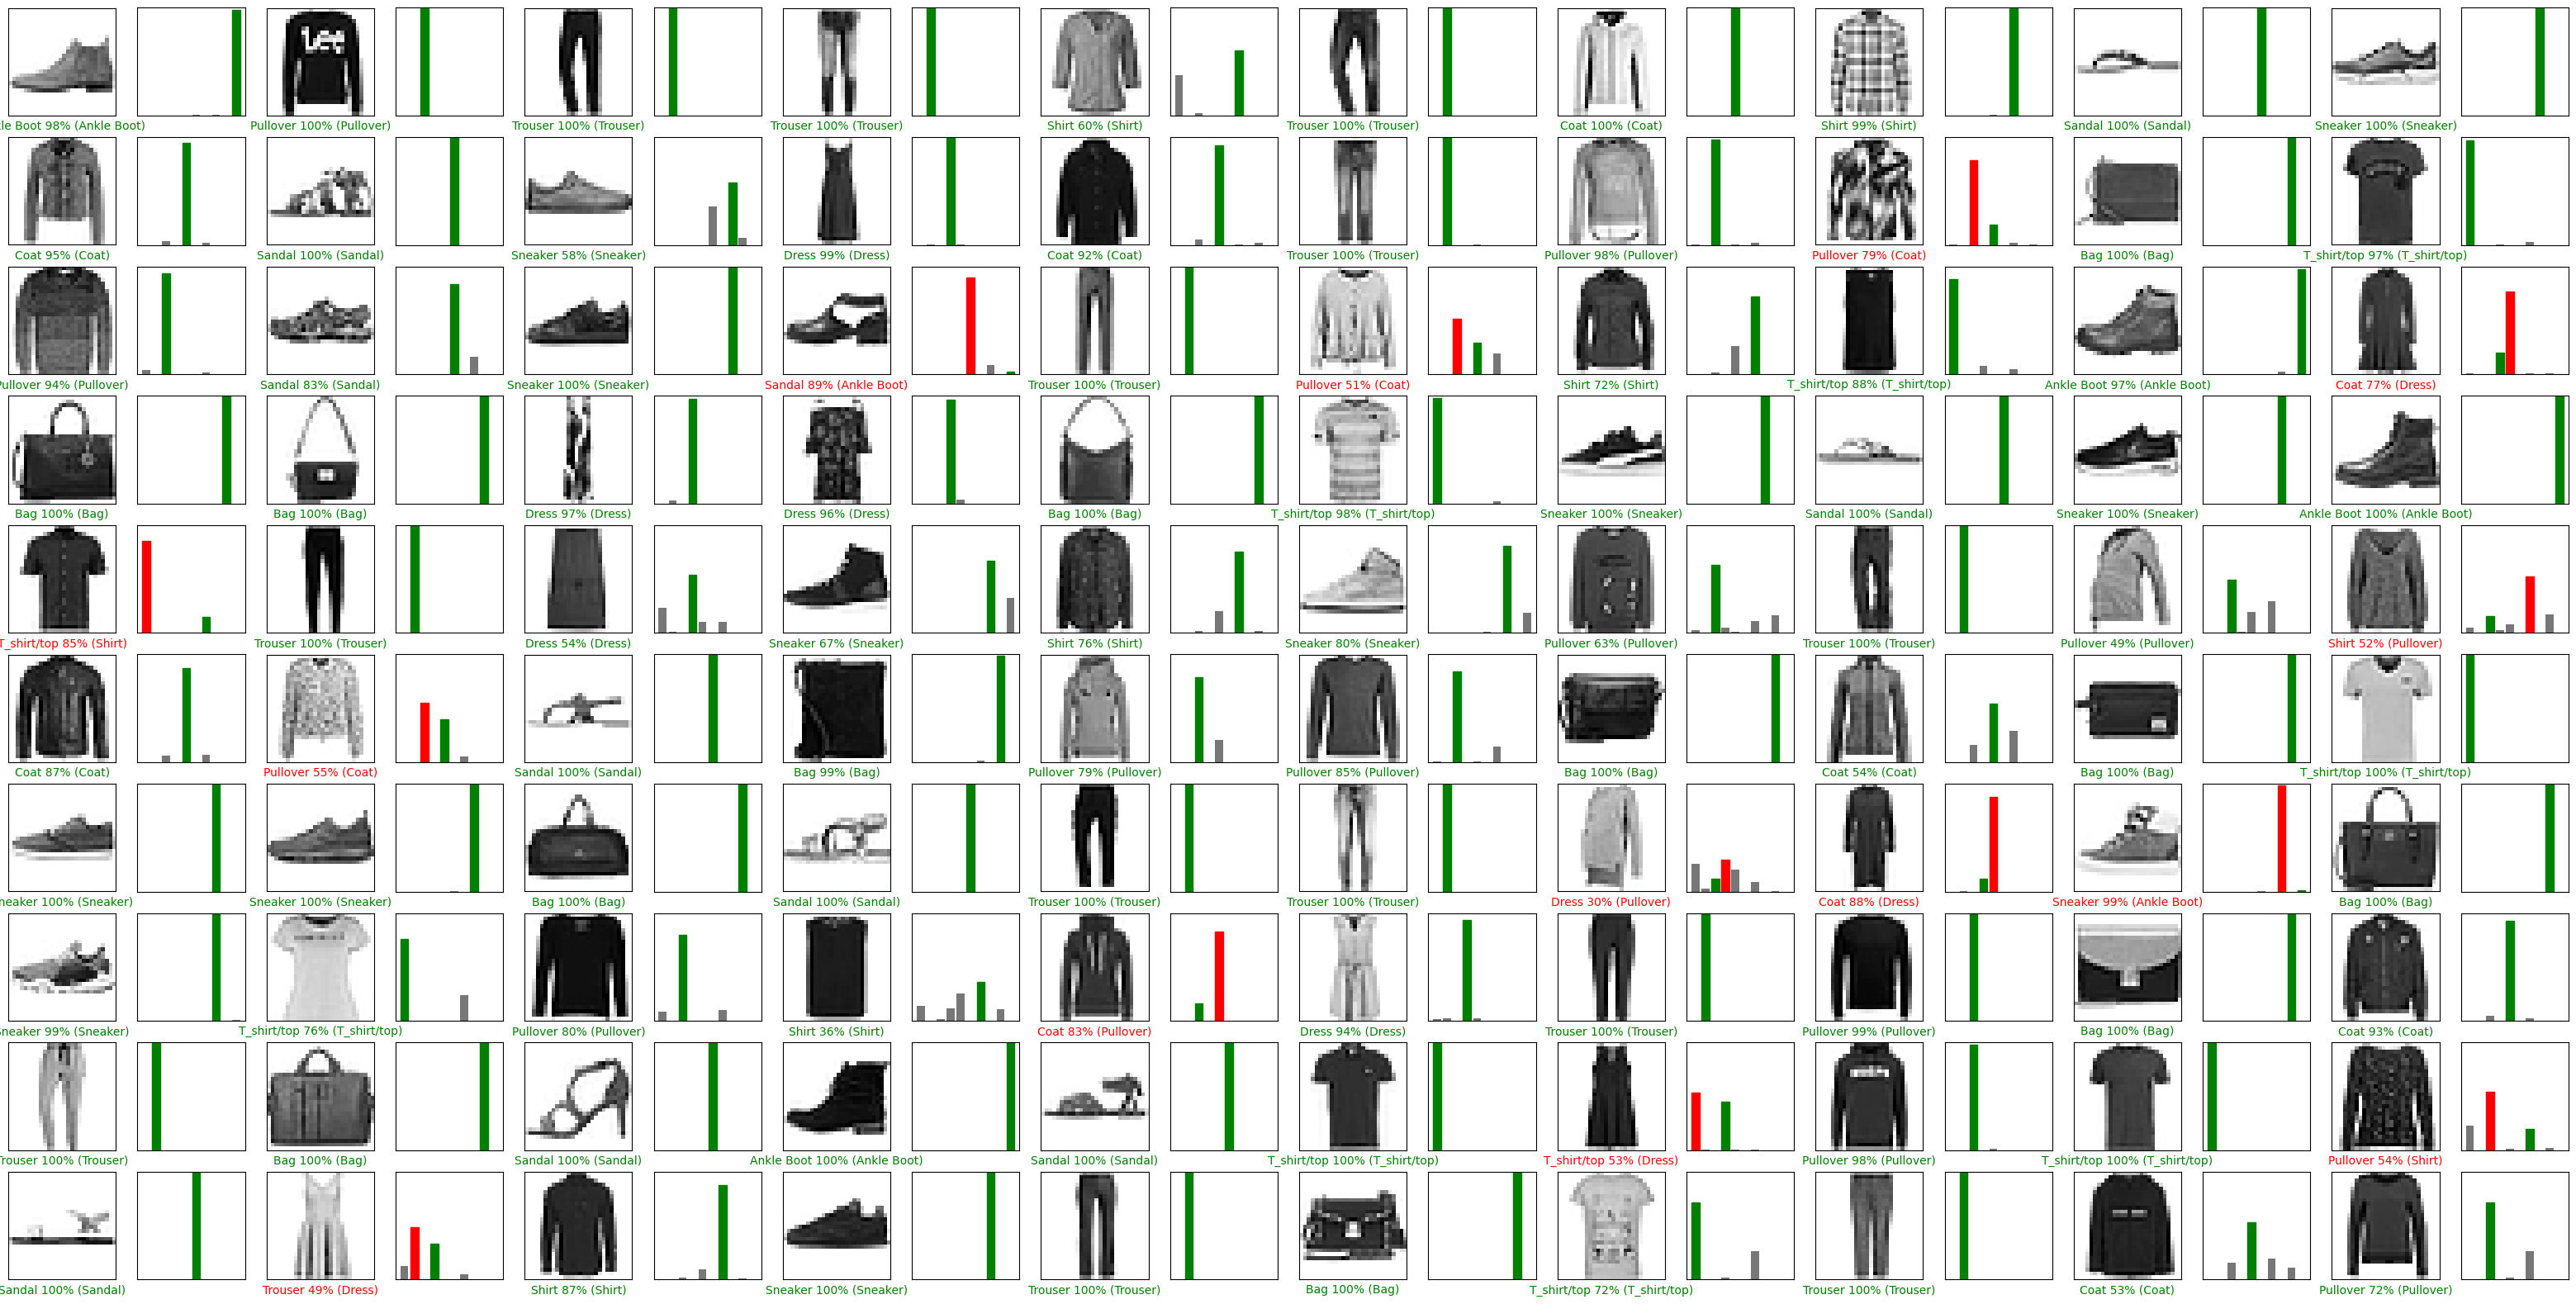

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

num_rows=10
num_cols=10
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()